In [1]:
import pickle
import numpy
import torch

with open('/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl', 'rb') as f:
    FFHQ = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
    # latent codes
SEED=20
z = torch.randn([1, FFHQ.z_dim]).cuda()
c = None                                # class labels (not used in this example)
img1 = FFHQ(z, c)                           # NCHW, float32, dynamic range [-1, +1]

/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [6]:
FFHQ

Generator(
  (synthesis): SynthesisNetwork(
    (b4): SynthesisBlock(
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b8): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b16): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b32): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConn

In [5]:
TOON.synthesis.b8.conv0.affine.weight

Parameter containing:
tensor([[-0.8123,  1.0000,  0.5899,  ...,  1.0551, -1.2470, -0.4006],
        [-1.6915, -2.0135, -0.4215,  ..., -1.8891, -1.6577,  0.9180],
        [-3.2205, -0.1234,  3.5783,  ..., -0.9654, -0.7227,  2.1040],
        ...,
        [ 0.2438,  1.2194,  0.2598,  ...,  2.9210, -0.4373, -0.1875],
        [ 0.2411,  1.6572,  0.1563,  ..., -1.7042, -1.1651, -0.3570],
        [-2.9233, -0.3164,  0.0740,  ...,  1.2124, -0.1656, -0.8338]],
       device='cuda:0')

In [3]:
ckpt_path = '/mnt/disk1/ivymm02/stylegan2-ada-pytorch/webtoon_train/00001-webtoon-auto1/network-snapshot-002000.pkl'

with open(ckpt_path, 'rb') as f:
    TOON = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
img2 = TOON(z, None)   


In [4]:
ckpt_path = '/mnt/disk1/ivymm02/stylegan2-ada-pytorch/__pycache__/ffhq-cartoon-blended-64.pkl'

with open(ckpt_path, 'rb') as f:
    TOON = pickle.load(f)['G_ema'].cuda()  # torch.nn.Module
img2 = TOON(z, None)   


ModuleNotFoundError: No module named 'dnnlib.tflib'

In [12]:
from training.networks import Generator
new_network = Generator(z_dim=256,                      # Input latent (Z) dimensionality.
        c_dim=0,                      # Conditioning label (C) dimensionality.
        w_dim=256,                      # Intermediate latent (W) dimensionality.
        img_resolution=256,             # Output resolution.
        img_channels=3, )
new_network

Generator(
  (synthesis): SynthesisNetwork(
    (b4): SynthesisBlock(
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b8): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b16): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConnectedLayer()
      )
    )
    (b32): SynthesisBlock(
      (conv0): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (conv1): SynthesisLayer(
        (affine): FullyConnectedLayer()
      )
      (torgb): ToRGBLayer(
        (affine): FullyConn

In [13]:
print(type(new_network))

<class 'torch_utils.persistence.persistent_class.<locals>.Decorator'>


In [8]:
FFHQ.synthesis.b8.conv1.affine.weight.shape

torch.Size([512, 512])

In [14]:

import torch.nn as nn
beta=0.5
#new_f.mapping= FFHQ.mapping

# new_f.synthesis.b4= FFHQ.synthesis.b4
# new_f.synthesis.b8= FFHQ.synthesis.b8
# new_f.synthesis.b16= FFHQ.synthesis.b16
# new_f.synthesis.b32= FFHQ.synthesis.b32
# new_f.synthesis.b64 = FFHQ.synthesis.b64
# new_f.synthesis.b128.conv1 = FFHQ.synthesis.b128.conv1
# new_f.synthesis.b128.torgb= FFHQ.synthesis.b128.torgb
#new_netwrok.synthesis.b8.conv1.affine.weight= nn.Parameter(torch.tensor([512, 512]).float())
new_network.synthesis.b8.conv1.affine.weight = nn.Parameter(torch.randn_like(new_network.synthesis.b8.conv1.affine.weight))
new_weight = FFHQ.synthesis.b8.conv1.affine.weight * beta + TOON.synthesis.b8.conv1.affine.weight * (1 - beta)
new_network.synthesis.b8.conv1.affine.weight=nn.Parameter(new_weight) #FFHQ.synthesis.b8.conv1.affine.weight*beta + TOON.synthesis.b8.conv1.affine.weight*(1-beta)
# new_f.synthesis.b256.torgb= FFHQ.synthesis.b256.torgb

img4= new_f(z, None)

TypeError: cannot assign 'torch.cuda.FloatTensor' as parameter 'weight' (torch.nn.Parameter or None expected)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2696528..1.4506122].


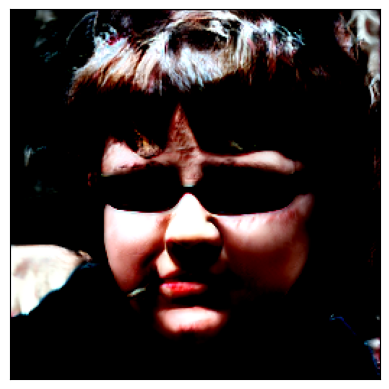

In [11]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img1.cpu().detach().permute(0, 2, 3, 1)[0].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.122249..1.5452076].


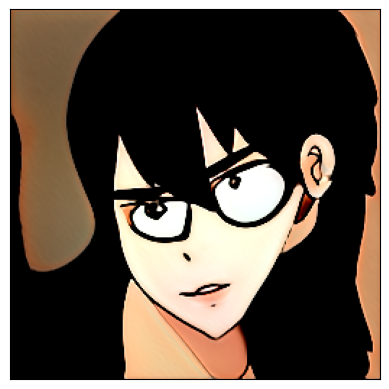

In [12]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img2.cpu().detach().permute(0, 2, 3, 1)[0].numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.240393..1.0104122].


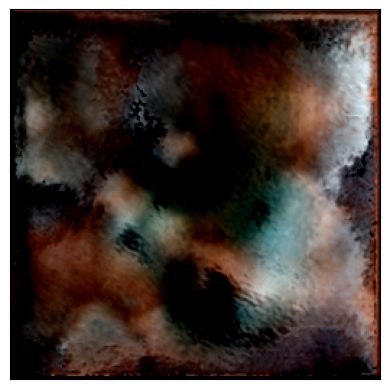

In [13]:
import matplotlib.pyplot as plt
plt.xticks([])
plt.yticks([])
plt.imshow(img4.cpu().detach().permute(0, 2, 3, 1)[0].numpy())

In [ ]:
!

: 

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1"

: 

In [222]:
!python projector.py --outdir=out --target=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/jobs.png \
    --network=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl

Loading networks from "/mnt/disk1/ivymm02/stylegan2-ada-pytorch/ffhq_train/00002-ffhq256-auto1/network-snapshot-001600.pkl"...
Computing W midpoint and stddev using 100 samples...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Traceback (most recent call last):
  File "/mnt/disk1/ivymm02/stylegan2-ada-pytorch/projector.py", line 210, in <module>
    run_projection() # pylint: disable=no-value-for-parameter
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/home/ivymm02/anaconda3/envs/myenv/lib/python3.9/site-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)

In [ ]:
!python generate.py --outdir=out --projected_w=out/projected_w.npz \
    --network=/mnt/disk1/ivymm02/stylegan2-ada-pytorch/cartoon_train/00006-cartoon-auto1/network-snapshot-001400.pkl

In [ ]:
!python generate.py --outdir=out --projected_w=out/projected_w.npz \
    --network=